In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#column settings for full column display
pd.set_option('display.max_columns', None)

data = pd.read_csv('../hotel_bookings.csv')

In [2]:
data_info = {
    "# of Rows": data.shape[0],
    "# of Columns": data.shape[1]
}

data_sample = data.head()

data_info

{'# of Rows': 119390, '# of Columns': 32}

In [3]:
data_sample

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Check data types and missing values
data_types = data.dtypes
missing_values = data.isnull().sum()

data_types_missing_values = pd.DataFrame({
    "Data Type": data_types,
    "Missing Values": missing_values
})

data_types_missing_values

,Data Type,Missing Values
hotel,object,0
is_canceled,int64,0
lead_time,int64,0
arrival_date_year,int64,0
arrival_date_month,object,0
arrival_date_week_number,int64,0
arrival_date_day_of_month,int64,0
stays_in_weekend_nights,int64,0
stays_in_week_nights,int64,0
adults,int64,0


  - **children**: 4 missing values.
  - **country**: 488 missing values.
  - **agent**: 16,340 missing values.
  - **company**: 112,593 missing values,

In [5]:
numerical_summary = data.describe()
numerical_summary

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


- **is_canceled**: About 37% of bookings were canceled.
- **lead_time**: Shows wide variation, with a mean of 104 days and a maximum of 737 days.
- **arrival_date_year**, **arrival_date_week_number**, **arrival_date_day_of_month**: Cover years 2015-2017, with the arrival date distributed across all months and days fairly evenly.
- **stays_in_weekend_nights** and **stays_in_week_nights**: Most stays are relatively short, with more stays during the week than on weekends.
- **adults**, **children**, **babies**: Primarily adult guests, with few children or babies on average.
- **is_repeated_guest**: A small fraction (about 3%) of bookings are from repeated guests.
- **previous_cancellations** and **previous_bookings_not_canceled**: Indicates some level of repeat booking behavior but with low average values.
- **booking_changes**: Changes to bookings are relatively infrequent.
- **adr** (Average Daily Rate): Has a wide range, from a minimum of -6.38 (which might be a data error) to a maximum of 5400, indicating variability in room rates.
- **required_car_parking_spaces** and **total_of_special_requests**: Most bookings do not require car parking, and about half have no special requests.

In [6]:
# Handling missing values for 'children' by replacing them with the median value
data['children'] = data['children'].fillna(data['children'].median())

# For 'country', we'll replace missing values with 'Unknown'
data['country'] = data['country'].fillna('Unknown')

# For 'agent' and 'company', missing values may indicate bookings without agents or companies,
# so I'll replace them with 0 to indicate 'No agent' or 'No company'
data['agent'] = data['agent'].fillna(0)
data['company'] = data['company'].fillna(0)

Missing values;

- **children**: Missing values replaced with the median.
- **country**: Missing values filled with 'Unknown'.
- **agent**, **company**: Missing values replaced with 0, indicating 'No agent' or 'No company'.

In [7]:
# Verify that missing values have been addressed
missing_values_after = data.isnull().sum()

missing_values_after

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [8]:
def dataframe_summary(dataframe):
    # Initialize dictionaries to hold columns by type
    summary = {
        'categorical': [],
        'numerical': [],
        'high_cardinality': [],
        'boolean': [],
        'date': [],
        'num_but_cat': []
    }

    # Total number of rows for percentage calculation
    total_rows = dataframe.shape[0]

    # Automatically determine thresholds based on dataset properties
    unique_values = dataframe.apply(lambda col: col.nunique())
    cat_threshold = unique_values.quantile(0.1)  # these quantiles can be adjusted as needed
    card_threshold = unique_values.quantile(0.9)

    for col in dataframe.columns:
        unique_count = unique_values[col]
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            if unique_count < cat_threshold:
                summary['num_but_cat'].append(col)
            else:
                summary['numerical'].append(col)
        elif pd.api.types.is_datetime64_any_dtype(dataframe[col]):
            summary['date'].append(col)
        elif pd.api.types.is_bool_dtype(dataframe[col]):
            summary['boolean'].append(col)
        else:  # Categorical by default
            if unique_count > card_threshold or unique_count > total_rows * 0.2:  # 20% of rows as high cardinality threshold
                summary['high_cardinality'].append(col)
            else:
                summary['categorical'].append(col)

    # Print summary
    print(f"Observations: {dataframe.shape[0]}\n",
          f"Variables: {dataframe.shape[1]}\n",
          f'Categorical: {len(summary["categorical"])} ({summary["categorical"]})\n',
          f'Numerical: {len(summary["numerical"])} ({summary["numerical"]})\n',
          f'High Cardinality: {len(summary["high_cardinality"])} ({summary["high_cardinality"]})\n',
          f'Numerical but Categorical: {len(summary["num_but_cat"])} ({summary["num_but_cat"]})\n',
          f'Boolean: {len(summary["boolean"])} ({summary["boolean"]})\n',
          f'Date: {len(summary["date"])} ({summary["date"]})')

    return summary

summary = dataframe_summary(data)
print(summary)


Observations: 119390
 Variables: 32
 Categorical: 11 (['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status'])
 Numerical: 18 (['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests'])
 High Cardinality: 1 (['reservation_status_date'])
 Numerical but Categorical: 2 (['is_canceled', 'is_repeated_guest'])
 Boolean: 0 ([])
 Date: 0 ([])
{'categorical': ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status'], 'numerical'

In [9]:
# It will enable us to take the necessary actions to suppress the outliers in the data set.

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1

    upper_limit = quartile3 + 1.5 * interquantile_range
    lower_limit = quartile1 - 1.5 * interquantile_range
    return lower_limit, upper_limit

def replace_with_thresholds(dataframe, variable):
    lower_limit, upper_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > upper_limit), variable] = round(upper_limit)
    dataframe.loc[(dataframe[variable] < lower_limit), variable] = round(lower_limit)

In [10]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
check_outlier_values = [
    'lead_time',
    'adr',
    'days_in_waiting_list',
    'adults',
    'children',
    'babies',
    'previous_cancellations',
    'previous_bookings_not_canceled'
]

def check_outlier(dataframe, col_name):
    lower_limit, upper_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] > upper_limit) > upper_limit) | (dataframe[col_name] < lower_limit)].any(axis=None):
        return True
    else:
        return False

In [12]:
for col in check_outlier_values:
    has_outliers = check_outlier(data, col)
    print(col, has_outliers)
    if has_outliers:
        replace_with_thresholds(data, col)
        print(f'>>> {col} has been suppressed. <<<')

lead_time False
adr False
days_in_waiting_list False
adults False
children False
babies True
>>> babies has been suppressed. <<<
previous_cancellations False
previous_bookings_not_canceled False


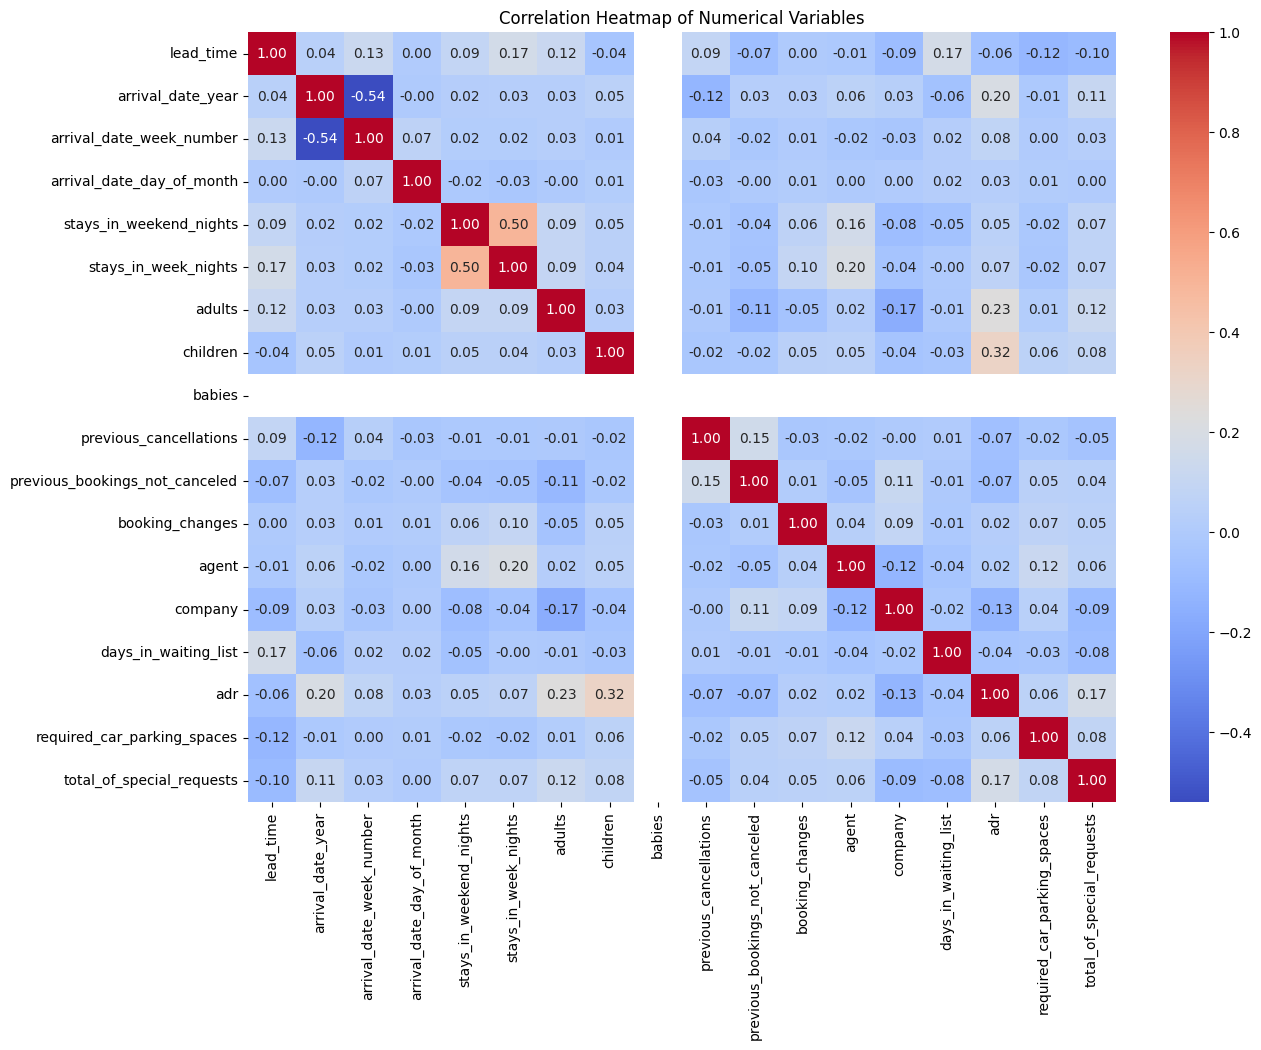

In [13]:
num_cols = summary['numerical']

correlation_matrix = data[num_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [14]:
country_names = {
    "PRT": "Portugal",
    "GBR": "United Kingdom",
    "USA": "United States",
    "ESP": "Spain",
    "IRL": "Ireland",
    "FRA": "France",
    "Unknown": "Unknown", # I added this to handle the missing values
    "ROU": "Romania",
    "NOR": "Norway",
    "OMN": "Oman",
    "ARG": "Argentina",
    "POL": "Poland",
    "DEU": "Germany",
    "BEL": "Belgium",
    "CHE": "Switzerland",
    "CN": "Canada", 
    "GRC": "Greece",
    "ITA": "Italy",
    "NLD": "Netherlands",
    "DNK": "Denmark",
    "RUS": "Russia",
    "SWE": "Sweden",
    "AUS": "Australia",
    "EST": "Estonia",
    "CZE": "Czech Republic",
    "BRA": "Brazil",
    "FIN": "Finland",
    "MOZ": "Mozambique",
    "BWA": "Botswana",
    "LUX": "Luxembourg",
    "SVN": "Slovenia",
    "ALB": "Albania",
    "IND": "India",
    "CHN": "China",
    "MEX": "Mexico",
    "MAR": "Morocco",
    "UKR": "Ukraine",
    "SMR": "San Marino",
    "LVA": "Latvia",
    "PRI": "Puerto Rico",
    "SRB": "Serbia",
    "CHL": "Chile",
    "AUT": "Austria",
    "BLR": "Belarus",
    "LTU": "Lithuania",
    "TUR": "Turkey",
    "ZAF": "South Africa",
    "AGO": "Angola",
    "ISR": "Israel",
    "CYM": "Cayman Islands",
    "ZMB": "Zambia",
    "CPV": "Cape Verde",
    "ZWE": "Zimbabwe",
    "DZA": "Algeria",
    "KOR": "South Korea",
    "CRI": "Costa Rica",
    "HUN": "Hungary",
    "ARE": "United Arab Emirates",
    "TUN": "Tunisia",
    "JAM": "Jamaica",
    "HRV": "Croatia",
    "HKG": "Hong Kong",
    "IRN": "Iran",
    "GEO": "Georgia",
    "AND": "Andorra",
    "GIB": "Gibraltar",
    "URY": "Uruguay",
    "JEY": "Jersey",
    "CAF": "Central African Republic",
    "CYP": "Cyprus",
    "COL": "Colombia",
    "GGY": "Guernsey",
    "KWT": "Kuwait",
    "NGA": "Nigeria",
    "MDV": "Maldives",
    "VEN": "Venezuela",
    "SVK": "Slovakia",
    "FJI": "Fiji",
    "KAZ": "Kazakhstan",
    "PAK": "Pakistan",
    "IDN": "Indonesia",
    "LBN": "Lebanon",
    "PHL": "Philippines",
    "SEN": "Senegal",
    "SYC": "Seychelles",
    "AZE": "Azerbaijan",
    "BHR": "Bahrain",
    "NZL": "New Zealand",
    "THA": "Thailand",
    "DOM": "Dominican Republic",
    "MKD": "North Macedonia",
    "MYS": "Malaysia",
    "ARM": "Armenia",
    "JPN": "Japan",
    "LKA": "Sri Lanka",
    "CUB": "Cuba",
    "CMR": "Cameroon",
    "BIH": "Bosnia and Herzegovina",
    "MUS": "Mauritius",
    "COM": "Comoros",
    "SUR": "Suriname",
    "UGA": "Uganda",
    "BGR": "Bulgaria",
    "CIV": "Ivory Coast",
    "JOR": "Jordan",
    "SYR": "Syria",
    "SGP": "Singapore",
    "BDI": "Burundi",
    "SAU": "Saudi Arabia",
    "VNM": "Vietnam",
    "PLW": "Palau",
    "QAT": "Qatar",
    "EGY": "Egypt",
    "PER": "Peru",
    "MLT": "Malta",
    "MWI": "Malawi",
    "ECU": "Ecuador",
    "MDG": "Madagascar",
    "ISL": "Iceland",
    "UZB": "Uzbekistan",
    "NPL": "Nepal",
    "BHS": "Bahamas",
    "MAC": "Macao",
    "TGO": "Togo",
    "TWN": "Taiwan",
    "DJI": "Djibouti",
    "STP": "Sao Tome and Principe",
    "KNA": "Saint Kitts and Nevis",
    "ETH": "Ethiopia",
    "IRQ": "Iraq",
    "HND": "Honduras",
    "RWA": "Rwanda",
    "KHM": "Cambodia",
    "MCO": "Monaco",
    "BGD": "Bangladesh",
    "IMN": "Isle of Man",
    "TJK": "Tajikistan",
    "NIC": "Nicaragua",
    "BEN": "Benin",
    "VGB": "British Virgin Islands",
    "TZA": "Tanzania",
    "GAB": "Gabon",
    "GHA": "Ghana",
    "TMP": "East Timor",
    "GLP": "Guadeloupe",
    "KEN": "Kenya",
    "LIE": "Liechtenstein",
    "GNB": "Guinea-Bissau",
    "MNE": "Montenegro",
    "UMI": "United States Minor Outlying Islands",
    "MYT": "Mayotte",
    "FRO": "Faroe Islands",
    "MMR": "Myanmar",
    "PAN": "Panama",
    "BFA": "Burkina Faso",
    "LBY": "Libya",
    "MLI": "Mali",
    "NAM": "Namibia",
    "BOL": "Bolivia",
    "PRY": "Paraguay",
    "BRB": "Barbados",
    "ABW": "Aruba",
    "AIA": "Anguilla",
    "SLV": "El Salvador",
    "DMA": "Dominica",
    "PYF": "French Polynesia",
    "GUY": "Guyana",
    "LCA": "Saint Lucia",
    "ATA": "Antarctica",
    "GTM": "Guatemala",
    "ASM": "American Samoa",
    "MRT": "Mauritania",
    "NCL": "New Caledonia",
    "KIR": "Kiribati",
    "SDN": "Sudan",
    "ATF": "French Southern Territories",
    "SLE": "Sierra Leone",
    "LAO": "Laos"
}

data['country'] = data['country'].map(country_names)

In [15]:
data[data['country'] == 'Unknown']['country'].value_counts()

country
Unknown    488
Name: count, dtype: int64

In [16]:
data['arrival_date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'] + '-' + data['arrival_date_day_of_month'].astype(str))
data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,Portugal,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,Portugal,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01


In [17]:
# Save the cleaned data to a new file
data.to_csv('../data/hotel_bookings_clean.csv', index=False)

In [18]:
data_clean = pd.read_csv('../data/hotel_bookings_clean.csv')
data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,Portugal,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,Portugal,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,United Kingdom,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,United Kingdom,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,United Kingdom,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64